<a href="https://colab.research.google.com/github/SushiFou/ML-Business-Case-Project/blob/main/ML_Business_Case_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="center"><b> Machine Learning Business Case Project </b></div>
---
<div align="center">Authors : Maxime Lepeytre | Soumaya Sabry | Alexandre Zajac | Olivier Boivin | Yann Kervella


<center>
<img src="https://github.com/SushiFou/ML-Business-Case-Project/blob/main/cover_image_tech.jpg?raw=1" width="800px"/>
</center>
</div>

## <div align="center"><font color='red'> DON'T FORGET TO COMMIT CHANGES ON GITHUB OR WORK WILL BE LOST <font></div>

## Context

Vous êtes consultant data scientist dans une grande entreprise de conseil
française. Votre client est une entreprise qui génère beaucoup de données
mais pour le moment aucun modèle de Machine Learning n'a été mis en
place pour les exploiter. Elle a donc naturellement fait appel à vous.

L’entreprise en question exploite plus de 3 000 magasins dans 7 pays
européens. Actuellement, les directeurs de magasin sont chargés d’estimer
leurs ventes quotidiennes jusqu'à six semaines à l'avance. Les ventes des
magasins sont influencées par de nombreux facteurs, notamment les
promotions, la concurrence, les vacances scolaires, la saisonnalité et la
localité. Avec des milliers de gestionnaires individuels prédisant les ventes
en fonction de leur situation particulière, la précision des résultats peut
être très variable.

Avec votre équipe de consultant data scientists, vous récupérez les
données disponibles et allez mener un projet complet pour les exploiter et
répondre à la problématique. Vous devez préparer et soutenir, pour le 21
janvier 2021, un rendu sous forme de slides qui tirera les conclusions de
votre travail, incluant une démonstration présentant les résultats du
modèle de Machine Learning de manière visuelle à destination des
utilisateur finaux. Vous aurez 12 minutes pour présenter votre travail à
votre donneur d’ordre client.

## Requirements


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Graphical settings
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          'axes.labelsize' : 15,
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
          "axes.titlecolor": "w", 
          'figure.figsize': [20, 8], 
          'axes.prop_cycle': plt.cycler(color=color_list), 
          'figure.dpi' : 75, 
          'legend.fontsize': 10,
          'font.size': 15 
          }
plt.rcParams.update(params)

## Data Importation

### gdown if using colab

In [2]:
!gdown "https://drive.google.com/uc?id=1IHr_vKHZ0P0lUIAksJ9joRLUoUtZdDSY"

Downloading...
From: https://drive.google.com/uc?id=1IHr_vKHZ0P0lUIAksJ9joRLUoUtZdDSY
To: /content/store.csv
100% 45.0k/45.0k [00:00<00:00, 1.44MB/s]


In [3]:
!gdown "https://drive.google.com/uc?id=17ur-ILBNAZDgjpqgPU1XBLYSIXc5cn5d"

Downloading...
From: https://drive.google.com/uc?id=17ur-ILBNAZDgjpqgPU1XBLYSIXc5cn5d
To: /content/test.csv
100% 1.43M/1.43M [00:00<00:00, 94.4MB/s]


In [4]:
!gdown "https://drive.google.com/uc?id=1kx5sSTcRj4aVS8KZgSCcdo9-5i1axh5n"

Downloading...
From: https://drive.google.com/uc?id=1kx5sSTcRj4aVS8KZgSCcdo9-5i1axh5n
To: /content/train.csv
38.1MB [00:01, 34.0MB/s]


In [5]:
!gdown "https://drive.google.com/uc?id=10p7JyO2DNkWbMRZoMNVPmipy1msZpBEV"

Downloading...
From: https://drive.google.com/uc?id=10p7JyO2DNkWbMRZoMNVPmipy1msZpBEV
To: /content/variables.txt
100% 1.58k/1.58k [00:00<00:00, 1.40MB/s]


## Data Exploration

In [8]:
store_data = pd.read_csv('store.csv')
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
train_data = pd.read_csv('train.csv', low_memory = False)
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [13]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [14]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [15]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


## Data Visualization

In [31]:
store_1_data = train_data[train_data['Store'] == 1].sort_values('Date', ascending=True).reset_index(drop=False)
store_1_data['Date'] = pd.to_datetime(store_1_data['Date'])
store_1_data.head()

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1016095,1,2,2013-01-01,0,0,0,0,a,1
1,1014980,1,3,2013-01-02,5530,668,1,0,0,1
2,1013865,1,4,2013-01-03,4327,578,1,0,0,1
3,1012750,1,5,2013-01-04,4486,619,1,0,0,1
4,1011635,1,6,2013-01-05,4997,635,1,0,0,1


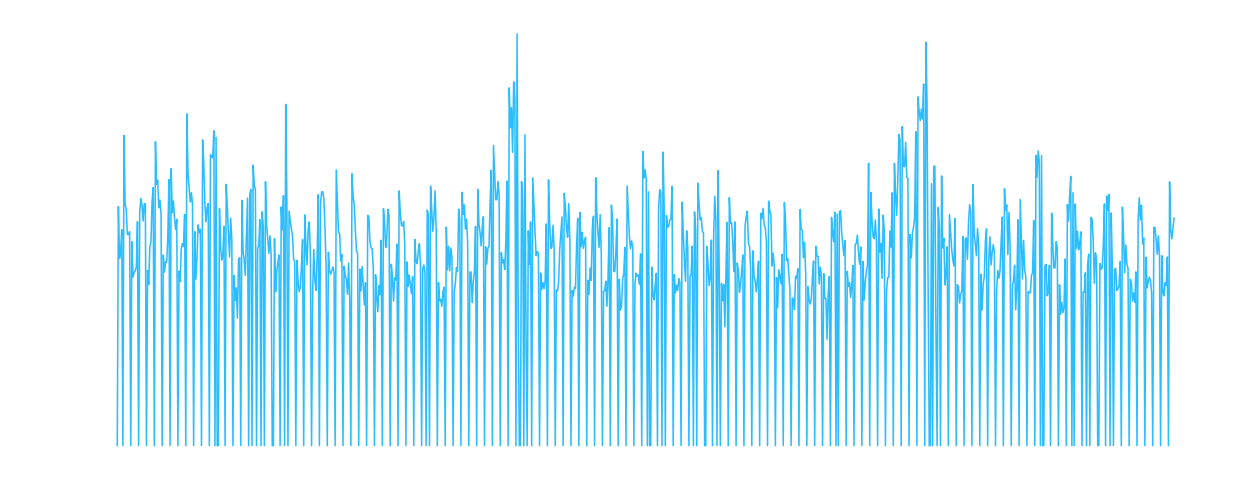

In [33]:
plt.plot(store_1_data['Date'], store_1_data['Sales'])
plt.show()